
**Instructions:** Execute the cells sequentially by by pressing shift+enter while selected or clicking the play button on the left. To reset the parameters of a cell, rerun it. Files are saved to this cloud environment and can be accessed through the folder icon on the left.

---

In [ ]:
#@title Install/Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'svg'
from scipy import sparse
from IPython.display import Markdown, display, clear_output
import ipywidgets as widgets

!pip install -q ipyvolume==v0.5.1
import ipyvolume as ipv
from google.colab import output
output.enable_custom_widget_manager()

#### PAH Specifications
PAH|Rings|Dimensions (Bohr)| $ \pi $ electrons|Fuse-type
:---:|:---:|:---:|:---:|:---:
benzene   |1|   8 x 8 x 3  | 6  |linear
napthalene|2|  12 x 8 x 3 | 10 |linear
anthracene|3|  16 x 8 x 3 | 14 |linear
tetracene |4|  20 x 8 x 3 | 18 |linear
pentacene |5|  24 x 8 x 3 | 22 |linear
hexacene  |6|  28 x 8 x 3 | 26 |linear
heptacene |7|  32 x 8 x 3 | 30 |linear
---       |---|---        |--- |---
perylene  |5| 20 X 12 x 3 | 20 | non-linear
coronene  |7| 20 X 16 x 3 | 24 | non-linear

## <center> Single Particle Hamiltonian <center/> 

Output()

<br>

<br>

<br>

<br>

<br>

---

,#i,-E_tot-,delta_E,--E_KE-,--E_x--,--E_c--,--E_ha-


,00,3.28041,3.28041,3.28041,0.00000,0.00000,0.00000


,01,3.62345,0.34304,3.46411,-2.81761,-0.46930,3.44625


,02,3.32899,-0.29446,3.39989,-2.75569,-0.46483,3.14962


,03,3.19533,-0.13367,3.37261,-2.73026,-0.46291,3.01589


,04,3.12987,-0.06545,3.36047,-2.71738,-0.46191,2.94870


,05,3.09573,-0.03415,3.35474,-2.70990,-0.46133,2.91222


,06,3.07708,-0.01865,3.35192,-2.70522,-0.46097,2.89135


,07,3.06653,-0.01054,3.35049,-2.70220,-0.46073,2.87898


,08,3.06040,-0.00613,3.34975,-2.70021,-0.46058,2.87144


,09,3.05675,-0.00365,3.34936,-2.69889,-0.46048,2.86676


,10,3.05453,-0.00222,3.34915,-2.69800,-0.46041,2.86379


,11,3.05316,-0.00137,3.34903,-2.69741,-0.46036,2.86189


,12,3.05229,-0.00086,3.34897,-2.69700,-0.46033,2.86066


,13,3.05174,-0.00055,3.34893,-2.69673,-0.46031,2.85985


,14,3.05139,-0.00035,3.34891,-2.69655,-0.46030,2.85932


,15,3.05116,-0.00023,3.34890,-2.69642,-0.46029,2.85897


,16,3.05101,-0.00015,3.34889,-2.69633,-0.46028,2.85873


,17,3.05091,-0.00010,3.34889,-2.69628,-0.46028,2.85857


   
Converged!
delta E = 0.000099 < 0.000100
HOMO-LUMO Gap is 0.13435 Ha (3.656 eV)
Final energy of 3.05091 Ha reached in 17 iterations


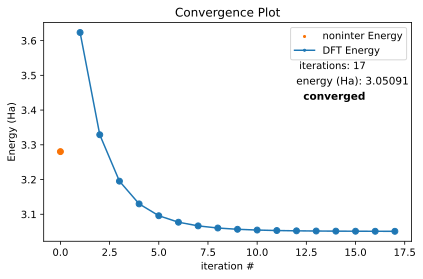

In [ ]:
#@title **DFT Calculator**

def hamiltonian_display(functional, har, ex, cor):
  ham = '## $$ \hat{h}_i = \hat{T}_{kin, i} +'
  if har == True:
    ham += 'v_{Ha}(n(r))'
  else: 
    ham += '0'
  if ex == True:
    if functional == 'LDA':
      ham += '+ v_{x}^{LDA}(n(r))'
    elif functional == 'PBE':
      ham += '+ v_{x}^{PBE}(n(r), \\nabla n(r))'
  else: 
    ham += '+ 0'
  if cor == True:
    if functional == 'LDA':
      ham += '+ v_{c}^{LDA}(n(r))'
    elif functional == 'PBE':
      ham += '+ v_{c}^{PBE}(n(r), \\nabla n(r))'
  else:
    ham += '+ 0'
  ham += '$$'
  display(Markdown(ham))

length_labels = widgets.Label(value='Box Lengths (Bohr): ')
lx_slider_dft = widgets.IntSlider(value=12,min=3,max=32,step=1,description='lx',disabled=False,readout_format='d',continuous_update=False)
ly_slider_dft = widgets.IntSlider(value=8,min=3,max=32,step=1,description='ly',disabled=False,readout_format='d',continuous_update=False)
lz_slider_dft = widgets.IntSlider(value=3,min=3,max=32,step=1,description='lz',disabled=False,readout_format='d',continuous_update=False)

functional_dropdown = widgets.Dropdown(options=[('LDA', 'LDA'), ('PBE (GGA)', 'PBE')],
                                       value='LDA',
                                       description='Fuctional:',
                                       disabled=False,
                                       layout = widgets.Layout(width='200px'))
hartree_dropdown = widgets.Dropdown(options=[('On', True), ('Off', False)],
                                       value=True,
                                       description='Hartree:',
                                       disabled=False,
                                       layout = widgets.Layout(width='175px'))
exchange_dropdown = widgets.Dropdown(options=[('On', True), ('Off', False)],
                                       value=True,
                                       description='Exchange:',
                                       disabled=False,
                                       layout = widgets.Layout(width='175px'))
correlation_dropdown = widgets.Dropdown(options=[('On', True), ('Off', False)],
                                       value=True,
                                       description='Correlation:',
                                       disabled=False,
                                       layout = widgets.Layout(width='175px'))
num_elec_label = widgets.Label(value='Number Electrons: ')
num_elec_dropdown = widgets.Dropdown(options=np.arange(2, 31, 2), 
                                    value=10, description=' ',
                                    disabled=False,
                                     layout = widgets.Layout(width='175px'))

converge_parameter_label = widgets.Label(value='Convergence Settings: ')
max_iter_dropdown = widgets.Dropdown(options=np.arange(5, 105, 5), 
                                    value=30, description='max iter',
                                    disabled=False,
                                     layout = widgets.Layout(width='150px'))
density_mix_dropdown = widgets.Dropdown(options=['OFF', '50/50', '60/40', '70/30', '80/20', '90/10'],
                                       value='70/30',
                                       description='density mix: ',
                                       disabled=False,
                                       layout = widgets.Layout(width='200px'))
e_tol_dropdown = widgets.Dropdown(options=['-3', '-4', '-5', '-6'],
                                       value='-4',
                                       description='energy tol (10^ Ha): ',
                                       disabled=False,
                                       layout = widgets.Layout(width='200px'),
                                        style = {'description_width': 'initial'})

filename_text = widgets.Text(description='Filename (.png): ',value='energy_log',style={'description_width': 'initial'})
save_button = widgets.Button(description='Save Image')

den_filename_text = widgets.Text(description='Filename (.png): ',value='density_slice',style={'description_width': 'initial'})
den_save_button = widgets.Button(description='Save Image')

orbital_filename_text = widgets.Text(description='Filename (.png): ',value='orbital_energies',style={'description_width': 'initial'})
orbital_save_button = widgets.Button(description='Save Image')

run_scf_button = widgets.Button(description='Run SCF')
run_scf_button.style.font_weight = 'bold'
reset_button = widgets.Button(description='Reset')

density_analysis_button = widgets.Button(description='Analyze Density')
run_scf_button.style.font_weight = 'bold'

side_select = widgets.SelectionSlider(
options=['lx', 'ly', 'lz'],
    value='lx',
    description='box side: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

scf_ui = widgets.HBox([run_scf_button, reset_button])
box_length_iso_ui = widgets.HBox([length_labels, lx_slider_dft, ly_slider_dft, lz_slider_dft])
parameter_ui = widgets.HBox([num_elec_label, num_elec_dropdown])

ham_ui = widgets.HBox([functional_dropdown, hartree_dropdown,
                       exchange_dropdown, correlation_dropdown])
convergence_ui = widgets.HBox([converge_parameter_label, max_iter_dropdown,
                               density_mix_dropdown, e_tol_dropdown])

output = widgets.interactive_output(hamiltonian_display, {'functional':functional_dropdown,
                                                 'har':hartree_dropdown,
                                                 'ex':exchange_dropdown,
                                                 'cor':correlation_dropdown})

energy_log = [0] #zero neede for first difference; removed after end of for loop
ener_diff_log = []
converged = None
exch_log = []
cor_log = []
har_log = []
kin_log = []
eigenvalue_log = []
eigenstate_log = []
density_log = [] 
grid_points = []
grid_lines = []

def energy_plot(den_log, ener_log, converge_state, show_fig=True, save_fig=False, filename=None):
  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot(1, 1, 1)
  plt.title('Convergence Plot')
  plt.scatter(0, energy_log[0], color='#F97306', label='noninter Energy')
  plt.plot(np.arange(1,len(energy_log[1:]) + 1), energy_log[1:], 'o-', label='DFT Energy')
  plt.legend(loc='upper right')
  plt.text(0.785, 0.800, f'iterations: {len(density_log) - 1}',
          horizontalalignment='center', verticalalignment='center',
          transform=ax.transAxes)
  plt.text(0.785, 0.730,f'            energy (Ha): {energy_log[-1]:.5f}',
          size=10.5, horizontalalignment='center', verticalalignment='center',
          transform= ax.transAxes)
  if converge_state == True:
    plt.text(0.79, 0.660,f'converged',
            size=10.5, horizontalalignment='center', verticalalignment='center',
            transform= ax.transAxes, weight='bold')
  elif converge_state == False:
    plt.text(0.79, 0.660,f'unconverged',
            size=10.5, horizontalalignment='center', verticalalignment='center',
            transform= ax.transAxes, weight='bold')
  plt.ylabel('Energy (Ha)')
  plt.xlabel('iteration #')
  plt.tight_layout()
  if save_fig:
    plt.savefig(f'{filename}.png', dpi = 800)
  if show_fig:
    plt.show()
  else:
    plt.close()

filename_text = widgets.Text(description='Filename (.png): ',value='energy_log',style={'description_width': 'initial'})
save_button = widgets.Button(description='Save Image')

def edge_cleaner(func_3d, nx, ny, nz, num_edges=1):
  func_3d = func_3d.reshape(nx, ny, nz)
  if num_edges == 1:
    func_3d[0,:,:] = 0
    func_3d[-1,:,:] = 0
    func_3d[:,0,:] = 0
    func_3d[:,-1,:] = 0
    func_3d[:,:,0] = 0
    func_3d[:,:,-1] = 0
  elif num_edges == 2:
    func_3d[0,:,:] = 0
    func_3d[-1,:,:] = 0
    func_3d[:,0,:] = 0
    func_3d[:,-1,:] = 0
    func_3d[:,:,0] = 0
    func_3d[:,:,-1] = 0
    func_3d[1,:,:] = 0
    func_3d[-2,:,:] = 0
    func_3d[:,1,:] = 0
    func_3d[:,-2,:] = 0
    func_3d[:,:,1] = 0
    func_3d[:,:,-2] = 0
  return func_3d.flatten()

def hard_walls(potential, nx, ny, nz):
  potential = potential.reshape(nx, ny, nz)
  potential[0,:,:]  = 1000
  potential[-1,:,:] = 1000
  potential[:,0,:]  = 1000
  potential[:,-1,:] = 1000
  potential[:,:,0]  = 1000
  potential[:,:,-1] = 1000
  return potential.flatten()

def integ_3d(func_3d, dx, dy, dz):
  return np.sum(func_3d * dx * dy * dz)

def norm_psi_and_den(e_vecs, occ_states, dx, dy, dz):
  norm_psi = np.zeros_like(e_vecs)
  el_den = np.zeros_like(e_vecs[:,0])
  for i in range(e_vecs.shape[1]):
      norm_psi[:,i] = e_vecs[:,i]/np.sqrt(integ_3d(e_vecs[:,i]**2, dx, dy, dz))
  for i in range(occ_states):
      el_den += 2* norm_psi[:,i]**2
  return norm_psi, el_den

def noninter_kin_e(norm_eigenvecs, occ_states, kin_mat, dx, dy, dz, nx, ny, nz):
  kin_energy_values = []
  for eig in norm_eigenvecs.T[:occ_states]:
    inner_prod = eig*kin_mat.dot(eig)
    inner_prod = edge_cleaner(inner_prod, nx, ny, nz, num_edges=1)
    orbital_k_en = integ_3d(inner_prod, dx, dy, dz)
    kin_energy_values.append(orbital_k_en)
  return sum(kin_energy_values)

def hartree(den, kin_oper, dx, dy, dz, nx, ny, nz):
  clean_den = np.ma.array(den, mask= abs(den) < 0.000001)
  clean_den = np.ma.filled(clean_den, fill_value=0.0)
  den = clean_den
  den = edge_cleaner(den, nx, ny, nz, num_edges=1)
  v_ha_flat = sparse.linalg.cg(-2*kin_oper,-4.*np.pi*den)[0]
  v_ha_flat = edge_cleaner(v_ha_flat, nx, ny, nz, num_edges=1)
  v_ha_ener = (1/2)*integ_3d(v_ha_flat*den, dx, dy, dz)
  return v_ha_flat, v_ha_ener

def lda_exchange(den, dx, dy, dz):
  exch_pot_lda = -(3/4)*(3/np.pi)**(1/3)*(den)**(1/3)
  clean_den = np.ma.array(den, mask= abs(den) < 0.000001)
  clean_den = np.ma.filled(clean_den, fill_value=0.0)
  den = clean_den
  exch_ener_lda = -(3/4)*(3/np.pi)**(1/3)*integ_3d(den**(4/3), dx, dy, dz)  
  return exch_pot_lda, exch_ener_lda

def lda_correlation(den, dx, dy, dz):
    ### paper: 10.1063/1.4958669
    a = (np.log(2)-1)/(2*np.pi**2)
    b = 20.4562557
    c = (4*np.pi/3)**(1/3)
    corr_pot = a*np.log(1 + b*c*den**(1/3) + b*(c**2)*den**(2/3))
    clean_den = np.ma.array(den, mask= abs(den) < 0.000001)
    clean_den = np.ma.filled(clean_den, fill_value=0.0)
    den = clean_den
    corr_en = integ_3d(den*corr_pot, dx, dy, dz)
    return corr_pot, corr_en

def RDG(den, der_1st, nx, ny, nz):
  clean_den = np.ma.array(den, mask = abs(den) < 0.000001)
  den = clean_den
  RDG = (2*3**(1/3)*np.pi**(2/3))**(-1) * abs(der_1st.dot(den)) * den**(-4/3)
  RDG = edge_cleaner(RDG, nx, ny, nz, num_edges=1)
  RDG = np.ma.filled(RDG, fill_value=0.0)
  return RDG

def pbe_exchange(den, D1st, dx, dy, dz, nx, ny, nz):
    ### paper: 10.1103/PhysRevLett.77.3865
    kappa = 0.804
    mu = 0.2195149727645171
    s = RDG(den, D1st, nx, ny, nz)
    F_xs = 1 + kappa - kappa * (1 + mu * s**2 / kappa)**(-1)
    exch_pot_pbe = F_xs * -(3/4)*(3/np.pi)**(1/3)*((den)**(1/3))
    clean_den = np.ma.array(den, mask= abs(den) < 0.000001)
    clean_den = np.ma.filled(clean_den, fill_value=0.0)
    den = clean_den
    exch_ener_pbe = integ_3d(den*exch_pot_pbe, dx, dy, dz)
    return exch_pot_pbe, exch_ener_pbe

def cor_den_grad(den, der_1st, nx, ny, nz):
    d_g = abs(der_1st.dot(den))
    clean_den = np.ma.array(den, mask = abs(den) < 0.000001)
    den = clean_den
    t = (d_g*np.pi**(1/6))/(4*3**(1/6)*den**(7/6))
    t = edge_cleaner(t, nx, ny, nz, num_edges=1)
    t = np.ma.filled(t, fill_value=0.0)
    return t

def pbe_correlation(den, der_1st, dx, dy, dz, nx, ny, nz):
    ### paper: 10.1103/PhysRevLett.77.3865  
    lda_c_pot = lda_correlation(den, dx, dy, dz)[0]
    beta = 0.06672455060314922
    gamma = 0.031090690869654894
    lda_c_pot = np.ma.array(lda_c_pot, mask = abs(lda_c_pot) < 0.000001)
    A = (beta/gamma)*((np.exp(-lda_c_pot/gamma)-1)**(-1))
    t = cor_den_grad(den, der_1st, nx, ny, nz)
    H = gamma*np.log(1+(beta/gamma)*t**2*((1+A*(t**2))/(1+A*(t**2)+(A**2)*(t**4))))
    cor_pot_pbe = lda_c_pot + H
    cor_ener_pbe = integ_3d(den*cor_pot_pbe, dx, dy, dz)
    return cor_pot_pbe, cor_ener_pbe

def reset(b):
  clear_output()
  lx_slider_dft.disabled = False
  ly_slider_dft.disabled = False
  lz_slider_dft.disabled = False
  num_elec_dropdown.disabled = False
  functional_dropdown.disabled = False
  hartree_dropdown.disabled = False
  exchange_dropdown.disabled = False
  correlation_dropdown.disabled = False
  run_scf_button.disabled = False
  max_iter_dropdown.disabled = False
  density_mix_dropdown.disabled = False
  e_tol_dropdown.disabled = False

  global energy_log, ener_diff_log, converged,exch_log, cor_log, har_log, kin_log, eigenvalue_log, eigenstate_log, density_log, grid_points, grid_lines
  energy_log = [0] #zero neede for first difference; removed after end of for loop
  ener_diff_log = []
  converged = False
  exch_log = []
  cor_log = []
  har_log = []
  kin_log = []
  eigenvalue_log = []
  eigenstate_log = []
  density_log = [] 
  grid_points = []
  grid_lines = []
  display(Markdown('## <center> Single Particle Hamiltonian <center/> '),
                output,
                Markdown('<br>'),
                ham_ui,
                Markdown('<br>'),
                box_length_iso_ui,
                Markdown('<br>'),
                parameter_ui,
                Markdown('<br>'),
                convergence_ui,
                Markdown('<br>'),
                scf_ui,
                Markdown('---'))

reset_button.on_click(reset)

def run_scf(b):
  lx_slider_dft.disabled = True
  ly_slider_dft.disabled = True
  lz_slider_dft.disabled = True
  num_elec_dropdown.disabled = True
  functional_dropdown.disabled = True
  hartree_dropdown.disabled = True
  exchange_dropdown.disabled = True
  correlation_dropdown.disabled = True
  run_scf_button.disabled = True
  max_iter_dropdown.disabled = True
  density_mix_dropdown.disabled = True
  e_tol_dropdown.disabled = True

  occ_states = int(num_elec_dropdown.value/2) 
  nextra = 2
  max_iter = int(max_iter_dropdown.value)

  # define the energy tolerance
  e_tol = 10**(int(e_tol_dropdown.value))

  nx, ny, nz = (5 * lx_slider_dft.value), (5 * ly_slider_dft.value), (5 * lz_slider_dft.value)
  grid_points.append([nx, ny, nz])
  xp, yp, zp = np.linspace(0, lx_slider_dft.value, nx), np.linspace(0, ly_slider_dft.value, ny), np.linspace(0, lz_slider_dft.value, nz)
  grid_lines.append([xp, yp, zp])

  diag1x = np.ones(nx)/(xp[1])
  diag1y = np.ones(nx)/(yp[1])
  diag1z = np.ones(nx)/(zp[1])

  D1x = sparse.spdiags(np.array([-diag1x, diag1x]), np.array([0,1]), nx, nx)
  D1y = sparse.spdiags(np.array([-diag1y, diag1y]), np.array([0,1]), ny, ny)
  D1z = sparse.spdiags(np.array([-diag1z, diag1z]), np.array([0,1]), nz, nz)

  D1st = sparse.kronsum(D1z,sparse.kronsum(D1y,D1x))

  diagx = np.ones(nx)/(xp[1]**2)
  diagy = np.ones(ny)/(yp[1]**2)
  diagz = np.ones(nz)/(zp[1]**2)

  Dx = sparse.spdiags(np.array([diagx, -2*diagx, diagx]), np.array([-1,0,1]), nx, nx)
  Dy = sparse.spdiags(np.array([diagy, -2*diagy, diagy]), np.array([-1,0,1]), ny, ny)
  Dz = sparse.spdiags(np.array([diagz, -2*diagz, diagz]), np.array([-1,0,1]), nz, nz)

  # construct the sparse matrix 
  T = -1/2 * sparse.kronsum(Dz,sparse.kronsum(Dy,Dx))
  
  columns = ['E_total', 'delta_E', 'E_KE', 'E_x', 'E_c', 'E_ha']
  df = pd.DataFrame(columns =['#i', 'E_tot'.center(7, "-"),
                              'delta_E'.center(7, "-"),
                              'E_KE'.center(7, "-"),
                              'E_x'.center(7, "-"),
                              'E_c'.center(7, "-"),
                              'E_ha'.center(7, "-")])
  display(df)

  for it_num in range(max_iter + 1):
    if it_num == 0:
      placeholder_density = np.zeros(T.shape[0]) ## placeholder density of zero for the first iteration; removed after loop
      density_log.append(placeholder_density)

    density = density_log[-1]
    density = np.ma.array(density, mask= abs(density) < 0.000001)
    density = np.ma.filled(density, fill_value=0.0)
    density = edge_cleaner(density, nx, ny, nz, num_edges=1)

    ### Hartree on or off
    if hartree_dropdown.value == True:
      if it_num == 0:
        har_pot = np.zeros(T.shape[0])
        har_ener = 0
      elif it_num != 0:  
        har_pot, har_ener = hartree(density, T, xp[1], yp[1], zp[1], nx, ny, nz)
    elif hartree_dropdown.value == False:
      har_pot = np.zeros(T.shape[0])
      har_ener = 0
      
    ### exchange lda, pbe, or off
    if exchange_dropdown.value == True:
      if functional_dropdown.value == 'LDA':
        if it_num == 0:
          exch_pot = np.zeros(T.shape[0])
          exch_ener = 0
        elif it_num != 0:
          exch_pot, exch_ener = lda_exchange(density, xp[1], yp[1], zp[1])
      elif functional_dropdown.value == 'PBE':
        if it_num == 0:
          exch_pot = np.zeros(T.shape[0])
          exch_ener = 0
        elif it_num != 0:
          exch_pot, exch_ener = pbe_exchange(density, D1st, xp[1], yp[1], zp[1], nx, ny, nz)
    elif exchange_dropdown.value == False:
      exch_pot = np.zeros(T.shape[0])
      exch_ener = 0

    ### correlation lda, pbe, or off
    if correlation_dropdown.value == True:
      if functional_dropdown.value == 'LDA':
        if it_num == 0:
          cor_pot = np.zeros(T.shape[0]) 
          cor_ener = 0
        elif it_num != 0:
          cor_pot, cor_ener = lda_correlation(density, xp[1], yp[1], zp[1])
      elif functional_dropdown.value == 'PBE':
        if it_num == 0:
          cor_pot = np.zeros(T.shape[0]) 
          cor_ener = 0
        elif it_num != 0:
          cor_pot, cor_ener = pbe_correlation(density, D1st, xp[1], yp[1], zp[1], nx, ny, nz)
    elif correlation_dropdown.value == False:
      cor_pot = np.zeros(T.shape[0]) 
      cor_ener = 0

    v_diagonal = har_pot + exch_pot + cor_pot
    v_clean = np.ma.array(v_diagonal, mask = abs(density) < 0.000001)
    v_clean = np.ma.filled(v_clean, fill_value=0.0)

    #write the hamiltonian
    V = sparse.diags(v_clean)
    
    H = T + V

    eigenenergies, raw_evecs = sparse.linalg.eigsh(H, k=occ_states+nextra, which='SM',mode='cayley')

    normalized_evecs, new_density = norm_psi_and_den(raw_evecs, occ_states, xp[1], yp[1], zp[1])

    new_density = edge_cleaner(new_density, nx, ny, nz, num_edges=1)

# density mixing section 'OFF', '60/40', '80/20', '90/10'
    if it_num == 0:
      density_log.append(new_density)
    elif it_num != 0:
      if density_mix_dropdown.value == 'OFF':
        new_new_density = 0.0*density + 1.0*new_density
      elif density_mix_dropdown.value == '50/50':
        new_new_density = 0.5*density + 0.5*new_density
      elif density_mix_dropdown.value == '60/40':
        new_new_density = 0.6*density + 0.4*new_density
      elif density_mix_dropdown.value == '70/30':
        new_new_density = 0.7*density + 0.3*new_density
      elif density_mix_dropdown.value == '80/20':
        new_new_density = 0.8*density + 0.2*new_density
      elif density_mix_dropdown.value == '90/10':
        new_new_density = 0.9*density + 0.1*new_density
      density_log.append(new_new_density)

    kin_ener = noninter_kin_e(normalized_evecs, occ_states, T, xp[1], yp[1], yp[1], nx, ny, nz)

    total_ener = kin_ener + har_ener + exch_ener + cor_ener
    delta_ener = total_ener - energy_log[-1]

    energy_log.append(total_ener)
    ener_diff_log.append(delta_ener)
    kin_log.append(kin_ener)
    exch_log.append(exch_ener)
    cor_log.append(cor_ener)
    har_log.append(har_ener)
    eigenvalue_log.append(eigenenergies)

    dm = pd.DataFrame(columns =[str(it_num).zfill(2), "{:.5f}".format(total_ener).zfill(7),
                                "{:.5f}".format(delta_ener).zfill(7),
                                "{:.5f}".format(kin_ener).zfill(7), "{:.5f}".format(exch_ener).zfill(7),
                                "{:.5f}".format(cor_ener).zfill(7), "{:.5f}".format(har_ener).zfill(7)])
    display(dm)

    if abs(delta_ener) < e_tol:
      converged = True
      latest_energies = eigenvalue_log[-1]
      HL_Gap = latest_energies[-2] - latest_energies[-3]
      HL_Gap_eV = round(HL_Gap*27.2114, 3)
      print('   ')
      print('Converged!')
      print(f'delta E = {abs(delta_ener):.6f} < {e_tol:.6f}')
      print(f'HOMO-LUMO Gap is {HL_Gap:.5f} Ha ({HL_Gap_eV:.3f} eV)')
      print(f"Final energy of {energy_log[-1]:.5f} Ha reached in {it_num} iterations")
      break
    if it_num == max_iter:
      converged = False
      print('   ')
      print(f'delta E = {abs(delta_ener):.6f} > {e_tol:.6f}')
      print("Not converged :( ")
      break

  del density_log[0]
  del energy_log[0]

  

  energy_plot(density_log, energy_log, converged)
  
  def save_energy_plot(b):
    energy_plot(density_log, energy_log, converged, show_fig=False,
                save_fig=True, filename=filename_text.value)
  save_button.on_click(save_energy_plot)
  display(widgets.HBox([filename_text, save_button]))

run_scf_button.on_click(run_scf)

display(Markdown('## <center> Single Particle Hamiltonian <center/> '),
                output,
                Markdown('<br>'),
                ham_ui,
                Markdown('<br>'),
                box_length_iso_ui,
                Markdown('<br>'),
                parameter_ui,
                Markdown('<br>'),
                convergence_ui,
                Markdown('<br>'),
                scf_ui,
                Markdown('---'))

In [ ]:
#@title **Electron Density 1**

color1 = "#D4CC47"
color2 = "#7C4D8B"

def hex_to_RGB(hex_str):
  """ #FFFFFF -> [255,255,255]"""
  #Pass 16 to the integer function for change of base
  return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
  """
  Given two hex colors, returns a color gradient
  with n colors.
  """
  assert n > 1
  c1_rgb = np.array(hex_to_RGB(c1))/255
  c2_rgb = np.array(hex_to_RGB(c2))/255
  mix_pcts = [x/(n-1) for x in range(n)]
  rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
  return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

colors = get_color_gradient(color1, color2, len(density_log))

nx = grid_points[0][0]
ny = grid_points[0][1]
nz = grid_points[0][2]

def density_analysis(index, show_fig=True, save_fig=False, filename=None):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  xp = grid_lines[0][0]
  yp = grid_lines[0][1]
  zp = grid_lines[0][2]
  for i in range(len(density_log)):
    density_it = density_log[i].reshape(nx,ny,nz)
    if index == 'lx':
      lin_avg_lx = []
      density_slice = density_it[0,:,:]
      den_slice_sum = np.zeros_like(density_slice)
      for j in range(nx):
        lin_avg_lx.append(density_it[j,:,:].mean())
      plt.plot(xp,lin_avg_lx,label=f'iteration: {i}',color=colors[i])
      plt.xlabel('l$_x$ (Bohr)')
    if index == 'ly':
      lin_avg_ly = []
      density_slice = density_it[:,0,:]
      den_slice_sum = np.zeros_like(density_slice)
      for j in range(ny):
        lin_avg_ly.append(density_it[:,j,:].mean())
      plt.plot(yp,lin_avg_ly,label=f'iteration: {i}',color=colors[i])
      plt.xlabel('l$_y$ (Bohr)')
    if index == 'lz':
      lin_avg_lz = []
      density_slice = density_it[:,:,0]
      den_slice_sum = np.zeros_like(density_slice)
      for j in range(nz):
        lin_avg_lz.append(density_it[:,:,j].mean())
      plt.plot(zp,lin_avg_lz,label=f'iteration: {i}',color=colors[i])
      plt.xlabel('l$_z$ (Bohr)')
  plt.text(1.27, 1.05,f'Final Energy (Ha): {energy_log[-1]:.5f}',
      size=10.5, horizontalalignment='center', verticalalignment='center',
      transform= ax.transAxes)
  plt.title('Planar Average')
  plt.ylabel('Density (e/Bohr$^{3}$)')
  plt.legend(bbox_to_anchor=(1.05, 1.0), ncol=3)

  if save_fig:
    plt.savefig(f'{filename}.png', dpi=800)
  if show_fig:
    plt.show()
  else:
    plt.close()

def save_den_plot(b):
  density_analysis(side_select.value, show_fig=False, save_fig=True,
                   filename=den_filename_text.value)

den_save_button.on_click(save_den_plot)

planar_den_output = widgets.interactive_output(density_analysis, {'index':side_select,
                                                                  'show_fig':widgets.fixed(True),
                                                                  'save_fig':widgets.fixed(False),
                                                                  'filename':widgets.fixed(None)})

display(side_select,
        planar_den_output,
        widgets.HBox([den_filename_text, den_save_button]))

SelectionSlider(continuous_update=False, description='box side: ', options=('lx', 'ly', 'lz'), value='lx')

Output()

In [ ]:
#@title **Isodensity Surface Comparison**


noninter_den = density_log[0].reshape(nx,ny,nz)
noninter_den_iso=noninter_den.mean()*2
converged_den = density_log[-1].reshape(nx,ny,nz)

def den_plotter():
  display(Markdown('''Here we can can compare the initial non-interacting density
  with the final converged density. Note that for the 
  comparison to be meaningful, the same isovalue needs to be used for 
  both surfaces.'''))
  print('\033[1m==============================\033[0m')
  print("\033[1m\033[94mElectron density @ iteration 0\033[0m")
  print('\033[1m==============================\033[0m')
  print(f'isovalue:\033[0m {noninter_den_iso:.5f} e/Bohr**3')
  ipv.clear()
  fig = ipv.figure(width=500, height=500)
  ipv.plot_isosurface(noninter_den,level=noninter_den_iso,controls=True)
  ipv.squarelim()
  ipv.xyzlabel(r'lx','ly','lz')
  ipv.style.box_off()
  ipv.show()
  display(Markdown('---'))
  print('\033[1m==============================\033[0m')
  print(f"\033[1m\033[94mElectron density @ iteration {len(density_log)}\033[0m")
  print('\033[1m==============================\033[0m')
  print(f'isovalue:\033[0m {noninter_den_iso:.5f} e/Bohr**3')
  ipv.clear()
  fig = ipv.figure(width=500, height=500)
  ipv.plot_isosurface(converged_den,level=noninter_den_iso,controls=True)
  ipv.squarelim()
  ipv.xyzlabel(r'lx','ly','lz')
  ipv.style.box_off()
  ipv.show()

den_plotter()


Here we can can compare the initial non-interacting density
  with the final converged density. Note that for the 
  comparison to be meaningful, the same isovalue needs to be used for 
  both surfaces.

Electron density @ iteration 0
isovalue: 0.06143 e/Bohr**3


---

Electron density @ iteration 26
isovalue: 0.06143 e/Bohr**3


In [ ]:
#@title **KS Orbitals**


it_num_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(eigenvalue_log)-1,
    step=1,
    description='Iteration #: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def eigenstate_analysis(index, show_fig=True, save_fig=False, filename=None):
  clear_output(wait=True)
  occ2 = len(eigenvalue_log[0])-2
  y_DFT = eigenvalue_log[index]
  HL_Gap = y_DFT[-2] - y_DFT[-3]
  HL_Gap_eV = round(HL_Gap*27.2114, 3)
  x_DFT = 1.5*np.ones(y_DFT.shape[0])
  fig = plt.figure(figsize=(4, 6))
  ax = fig.add_subplot(1, 1, 1)
  plt.title('Orbital Energies')
  plt.ylabel("Energy (Ha)",labelpad=7)
  plt.scatter(x_DFT[:-2],y_DFT[:-2],marker=0,s=1200,linewidths=4, color='green', label='occupied')
  plt.scatter(x_DFT[-2:],y_DFT[-2:],marker=0,s=1200,linewidths=4, color='#F97306', label='virtual')
  plt.legend(bbox_to_anchor=(1.3, 1))
  plt.rcParams["legend.markerscale"] = 0.35
  plt.xticks([])
  plt.xlim([-0.1,3.3])
  plt.ylim([min(y_DFT)-0.03,max(y_DFT)+0.03])

  plt.text(1.07, 0.855, f'DFT iteration #{index}',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
  plt.text(1.07, 0.810, f'     Energy: {energy_log[index]:.5f} Ha',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
  plt.text(1.07, 0.765, f'      H-L Gap: {HL_Gap:.4f} Ha',
      horizontalalignment='center', verticalalignment='center',
      transform=ax.transAxes)
  plt.text(1.07, 0.720, f'                       ({HL_Gap_eV:.3f} eV)',
    horizontalalignment='center', verticalalignment='center',
    transform=ax.transAxes)
  
  annotationsDFT = ['HOMO-'+str(i) for i in range(occ2)]
  annotationsDFT[0] = 'HOMO'
  annotationsDFT.insert(0,'LUMO')
  annotationsDFT.insert(0,'LUMO+1')
  for i, label in enumerate(reversed(annotationsDFT)):
      plt.annotate(label, (x_DFT[i] + 0.005, y_DFT[i]),size=8)
      plt.text(x_DFT[i]-0.9, y_DFT[i], "{:.3f}".format(y_DFT[i]), size=8)
  ax.spines['left'].set_position(('axes', .16))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  if save_fig:
    plt.tight_layout()
    plt.savefig(f'{filename}.png', dpi=800)
  if show_fig:
    plt.show()
  else:
    plt.close()

def save_orbital_plot(b):
  eigenstate_analysis(it_num_slider.value, show_fig=False, save_fig=True,
                      filename=orbital_filename_text.value)

orbital_save_button.on_click(save_orbital_plot)

eigenstate_output = widgets.interactive_output(eigenstate_analysis, {'index':it_num_slider,
                                                                  'show_fig':widgets.fixed(True),
                                                                  'save_fig':widgets.fixed(False),
                                                                  'filename':widgets.fixed(None)})

display(it_num_slider,
        eigenstate_output,
        widgets.HBox([orbital_filename_text, orbital_save_button]))





How the energies of the KS orbitals change as a function of iteration number
can also be realized here through this interactive widget.


IntSlider(value=0, continuous_update=False, description='Iteration #: ', max=17)

Output()


## **References**

* Hohenberg, P.; Kohn, W. Inhomogeneous Electron Gas. Phys. Rev. **1964**, 136, B864-B871. 

*  Kohn, W.; Sham, L. J. Self-Consistent Equations Including Exchange and Correlation Effects. *Physical Review* **1965**, 140. 

*  Baseden, K. A.; Tye, J. W. Introduction to Density Functional Theory: Calculations by Hand on the Helium Atom. *Journal of Chemical Education* **2014**, 91, 2116–2123. 

*  Chachiyo, T. Communication: Simple and Accurate Uniform Electron Gas Correlation Energy for the Full Range of Densities. *The Journal of Chemical Physics* **2016**, 145, 021101.

* Halpern, A. M.; Ge, Y.; Glendening, E. D. Visualizing Solutions of the One-Dimensional Schrödinger Equation Using a Finite Difference Method. *Journal of Chemical Education* **2022**, 99, 3053–3060. 
